# Biodiversity Intactness Index change in Phoenix subdivision

### background
In 2021, Maricopa County, which encompasses the Phoenix metropolitan area, was the US county that added the most developed land since 2001 [1]. Urban sprawl creates pressure on biodiversity and natural areas. In this task you will explore a dataset showing values for a biodiversity intactness index (BII) [2, 3] to find changes in this BII around the Phoenix area from 2017 to 2020. 


Instructions

1. Data access:

- a: BII data: This dataset is part of the MPC STAC catalog. You will need to access the ‘io-biodiversity’ collection and look for the 2017 and 2020 rasters covering Phoenix subdivision. You can use the following coordinates for a bounding box: 
[-112.826843, 32.974108, -111.184387, 33.863574]
- b: Phoenix subdivision: You will find the Phoenix subdivision polygon in the Census County Subdivision shapefiles for Arizona: https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=County+Subdivisions

2. Create a map showing the Phoenix subdivision within an appropriate geographical context. You may use any vector datasets to create your map. (You can also check out the contextily package.)

3. Calculate the percentage of area of the Phoenix subdivision with a BII of at least 0.75 in 2017. Obtain the same calculation for 2020. HINTS (useful or not depending on your workflow): Let x be an xarray.DataArray. We can select all the values greater than n by simply doing x>n. This will return an xarray.DataArray with boolean values. You can then transform this into an xarray.DataArray with 0s and 1s (instead of True/False) by casting it as type ‘int’. To calculate the percentage area: (pixels in class)/(total pixels) * 100. 

4. Create a visualization showing the area with BII>=0.75 in 2017 that was lost by 2020. Here’s an example:


In [1]:
#calling in all the packages i might need

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import xarray as xr
import rioxarray as rioxr
from shapely.geometry import box

from rasterio.features import rasterize # for rasterizing polygons

import pystac_client
import planetary_computer

# used to access STAC catalogs
from pystac_client import Client
# used to sign items from the MPC STAC catalog
import planetary_computer

from shapely.geometry import Polygon

# ----- other libraries for nice ouputs
from IPython.display import Image

from geogif import gif  # to create gif


In [2]:
catalog = pystac_client.Client.open(
    'https://planetarycomputer.microsoft.com/api/stac/v1',
    modifier=planetary_computer.sign_inplace,)

In [3]:
#info and bio, ask yutian if we need background info for this
bio_collection = catalog.get_child('io-biodiversity')
bio_collection

id: io-biodiversity
title: Biodiversity Intactness
"description: Generated by [Impact Observatory](https://www.impactobservatory.com/), in collaboration with [Vizzuality](https://www.vizzuality.com/), these datasets estimate terrestrial Biodiversity Intactness as 100-meter gridded maps for the years 2017-2020. Maps depicting the intactness of global biodiversity have become a critical tool for spatial planning and management, monitoring the extent of biodiversity across Earth, and identifying critical remaining intact habitat. Yet, these maps are often years out of date by the time they are available to scientists and policy-makers. The datasets in this STAC Collection build on past studies that map Biodiversity Intactness using the [PREDICTS database](https://onlinelibrary.wiley.com/doi/full/10.1002/ece3.2579) of spatially referenced observations of biodiversity across 32,000 sites from over 750 studies. The approach differs from previous work by modeling the relationship between observed biodiversity metrics and contemporary, global, geospatial layers of human pressures, with the intention of providing a high resolution monitoring product into the future. Biodiversity intactness is estimated as a combination of two metrics: Abundance, the quantity of individuals, and Compositional Similarity, how similar the composition of species is to an intact baseline. Linear mixed effects models are fit to estimate the predictive capacity of spatial datasets of human pressures on each of these metrics and project results spatially across the globe. These methods, as well as comparisons to other leading datasets and guidance on interpreting results, are further explained in a methods [white paper](https://ai4edatasetspublicassets.blob.core.windows.net/assets/pdfs/io-biodiversity/Biodiversity_Intactness_whitepaper.pdf) entitled “Global 100m Projections of Biodiversity Intactness for the years 2017-2020.” All years are available under a Creative Commons BY-4.0 license."
"providers: Impact Observatory (processor, producer, licensor) Vizzuality (processor) Microsoft (host)"
type: Collection
"item_assets: {'data': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': 'Biodiversity Intactness', 'description': 'Terrestrial biodiversity intactness at 100m resolution', 'raster:bands': [{'sampling': 'area', 'data_type': 'float32', 'spatial_resolution': 100}]}}"
msft:region: westeurope
msft:container: impact
msft:storage_account: pcdata01euw
msft:short_description: Global terrestrial biodiversity intactness at 100m resolution for years 2017-2020
https://stac-extensions.github.io/item-assets/v1.0.0/schema.json


In [4]:
# Temporal range of interest

bbox_17 = [-112.826843, 32.974108, -111.184387, 33.863574]


In [11]:
# catalog search
search_17 = catalog.search(
    collections = ['io-biodiversity'],
    bbox = bbox_17)
search_17

In [12]:
items_17 = search_17.item_collection()
len(items_17)

4

In [13]:
items_17

id: bii_2020_34.74464974521749_-115.38597824385106_cog
"bbox: [-115.3859782, 27.565314, -108.2066425, 34.7446497]"
datetime: None
proj:epsg: 4326
"proj:shape: [7992, 7992]"
end_datetime: 2020-12-31T23:59:59Z
"proj:transform: [0.0008983152841195215, 0.0, -115.38597824385106, 0.0, -0.0008983152841195215, 34.74464974521749, 0.0, 0.0, 1.0]"
start_datetime: 2020-01-01T00:00:00Z
https://stac-extensions.github.io/projection/v1.0.0/schema.json
https://stac-extensions.github.io/raster/v1.1.0/schema.json
https://stac-extensions.github.io/version/v1.1.0/schema.json


In [18]:
# get first item in the catalog search
item_17 = items_17[3]
type(item_17)

pystac.item.Item

In [19]:
print('id:' , item_17.id)
item_17.properties

id: bii_2017_34.74464974521749_-115.38597824385106_cog


{'datetime': None,
 'proj:epsg': 4326,
 'proj:shape': [7992, 7992],
 'end_datetime': '2017-12-31T23:59:59Z',
 'proj:transform': [0.0008983152841195215,
  0.0,
  -115.38597824385106,
  0.0,
  -0.0008983152841195215,
  34.74464974521749,
  0.0,
  0.0,
  1.0],
 'start_datetime': '2017-01-01T00:00:00Z'}

In [20]:
for key in item_17.assets.keys():
    print(key, '--', item_17.assets[key].title)

data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


In [21]:
# plot rendered preview
Image(url=item_17.assets['rendered_preview'].href, width=500)

# for year 2020

In [112]:
item_20 = items_17[0]
type(item_20)

pystac.item.Item

In [113]:
print('id:' , item_20.id)
item_20.properties

id: bii_2020_34.74464974521749_-115.38597824385106_cog


{'datetime': None,
 'proj:epsg': 4326,
 'proj:shape': [7992, 7992],
 'end_datetime': '2020-12-31T23:59:59Z',
 'proj:transform': [0.0008983152841195215,
  0.0,
  -115.38597824385106,
  0.0,
  -0.0008983152841195215,
  34.74464974521749,
  0.0,
  0.0,
  1.0],
 'start_datetime': '2020-01-01T00:00:00Z'}

In [114]:
for key in item_20.assets.keys():
    print(key, '--', item_20.assets[key].title)

data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


In [115]:
# plot rendered preview
Image(url=item_20.assets['rendered_preview'].href, width=500)

# extract
time to finally plot and extract data

In [121]:
az_17 = rioxr.open_rasterio(item_17.assets['data'].href)
az_17

<xarray.DataArray (band: 1, y: 7992, x: 7992)>
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57 27.57
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [122]:
az_20 = rioxr.open_rasterio(item_20.assets['data'].href)
az_20

<xarray.DataArray (band: 1, y: 7992, x: 7992)>
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57 27.57
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

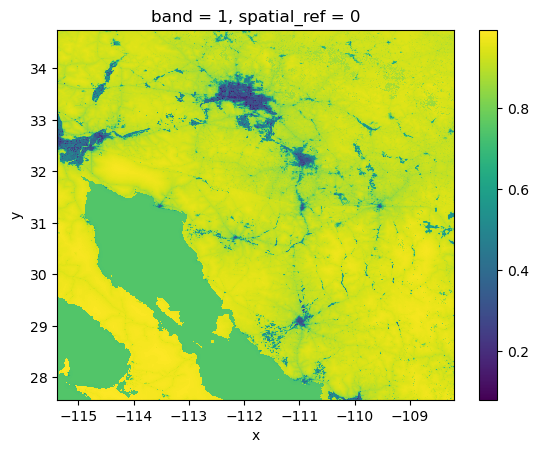

In [100]:
az_20.plot()

In [123]:
# original dimensions and coordinates


# remove length 1 dimension (band)
az_17 = az_17.squeeze().drop('band')

az_20 = az_20.squeeze().drop('band')


In [124]:
# i have to clip two times before we can mask
az_17 = az_17.rio.clip_box(*phoenix.total_bounds)

az_20 = az_20.rio.clip_box(*phoenix.total_bounds)

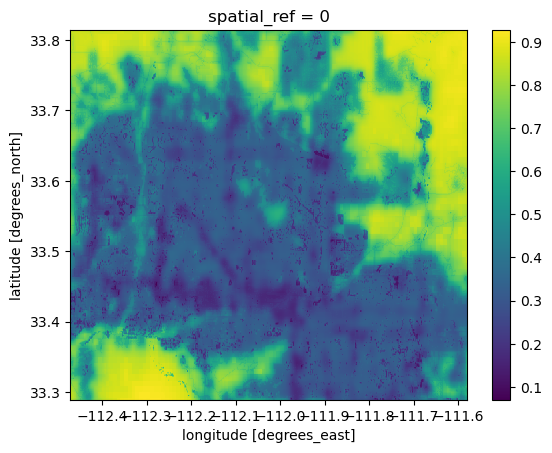

In [116]:
az_17.plot()

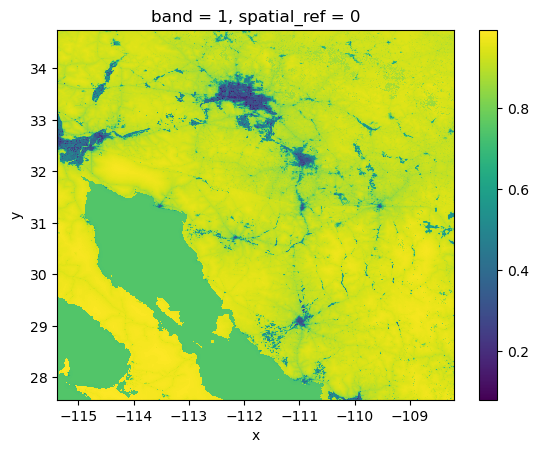

In [110]:
az_20.plot()

# calling in arizona county

In [26]:
ar = gpd.read_file('data/tl_2022_04_cousub.shp')
ar.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,005,91198,01934931,0400591198,Flagstaff,Flagstaff CCD,22,Z5,G4040,NaN,NaN,NaN,S,12231052883,44653332,+35.1066114,-111.3662497,"POLYGON ((-112.13370 35.85596, -112.13368 35.8..."
1,04,005,91838,01934953,0400591838,Kaibab Plateau,Kaibab Plateau CCD,22,Z5,G4040,NaN,NaN,NaN,S,7228864534,29327221,+36.5991097,-112.1368033,"POLYGON ((-112.66039 36.53941, -112.66033 36.5..."
2,04,005,91683,01934950,0400591683,Hualapai,Hualapai CCD,22,Z5,G4040,NaN,NaN,NaN,S,2342313339,3772690,+35.9271665,-113.1170408,"POLYGON ((-113.35416 36.04097, -113.35416 36.0..."
3,04,023,92295,01934961,0402392295,Nogales,Nogales CCD,22,Z5,G4040,NaN,NaN,NaN,S,1762322938,2382710,+31.4956020,-111.0171332,"POLYGON ((-111.36692 31.52136, -111.36316 31.5..."
4,04,023,92550,01934966,0402392550,Patagonia,Patagonia CCD,22,Z5,G4040,NaN,NaN,NaN,S,1439530300,685527,+31.5664619,-110.6410279,"POLYGON ((-110.96273 31.68695, -110.96251 31.6..."


<Axes: >

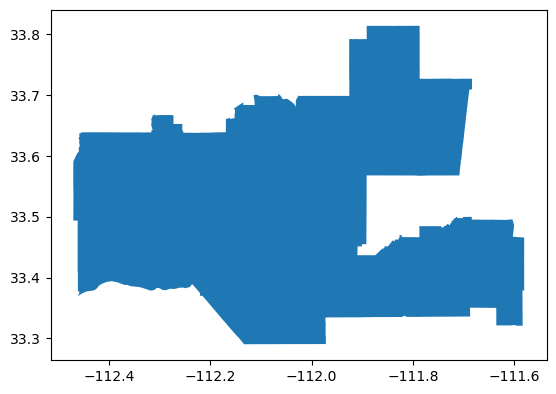

In [28]:
phoenix = ar[ar.NAME == 'Phoenix']
phoenix.plot()

# Question 2

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

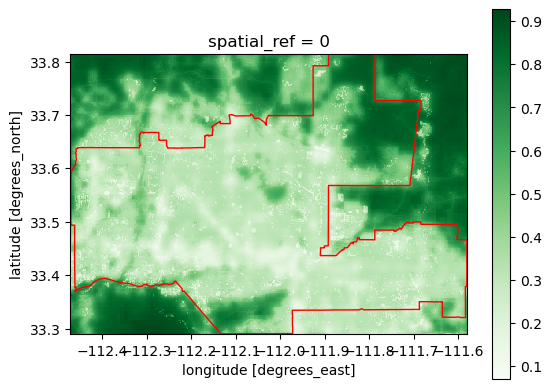

In [92]:
fig, ax = plt.subplots()

az_17.plot(ax = ax,
                cmap = 'Greens'
               )
phoenix.plot(ax = ax,
             color = 'none',
             edgecolor = 'red'
            )

#title and make it prettier!

In [ ]:
#make sure to change crs for map, and also make sure to drop and squeeze() for the rasters

In [ ]:
#create the mask, then filter the raster for

# For Question 3: map of Phoenix

In [42]:
phoenix

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
10,04,013,92601,01934968,0401392601,Phoenix,Phoenix CCD,22,Z5,G4040,NaN,NaN,NaN,S,2806478817,9471127,+33.5211331,-112.0284405,"POLYGON ((-112.47014 33.55996, -112.47011 33.5..."


In [125]:
#make a mask first
import xarray as xr
import rioxarray as rioxr

# create raster mask based on  polygon
phoenix_mask = rasterize(shapes = [phoenix.loc[10, 'geometry']],  # a list of geometries
                        out_shape = az_20.shape,           # shape of outout np array (shape of raster)
                        transform = az_20.rio.transform(), # transformation of raster ## change CRS and drop and squeeze# original dimensions and coordinates
                        all_touched = True)

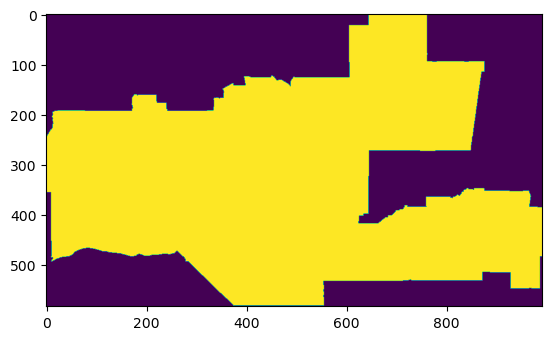

In [126]:
plt.imshow(phoenix_mask)

In [186]:
phoenix_bii_20 = az_20 * phoenix_mask

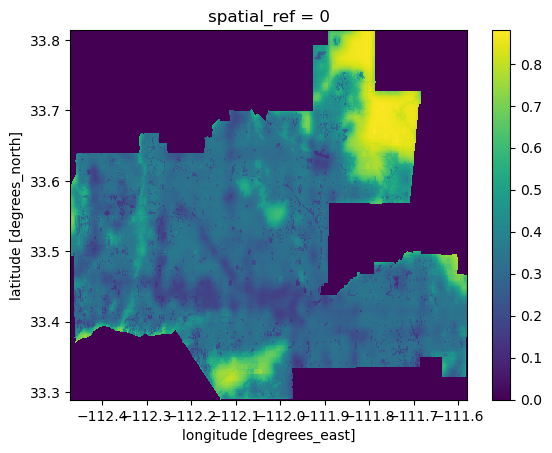

In [174]:
phoenix_bii_20.plot()

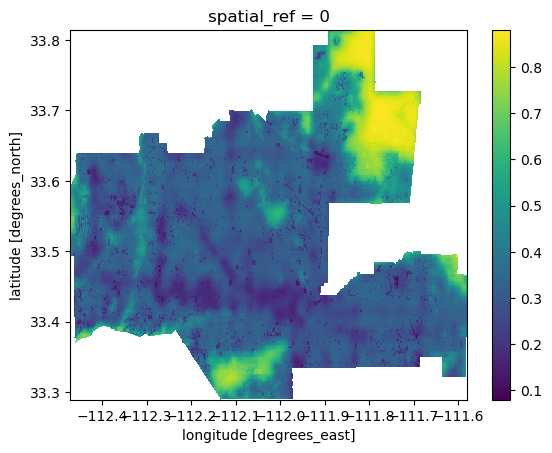

In [187]:
phoenix_bii_20 = phoenix_bii_20.where(phoenix_bii_20 != 0)
phoenix_bii_20.plot()

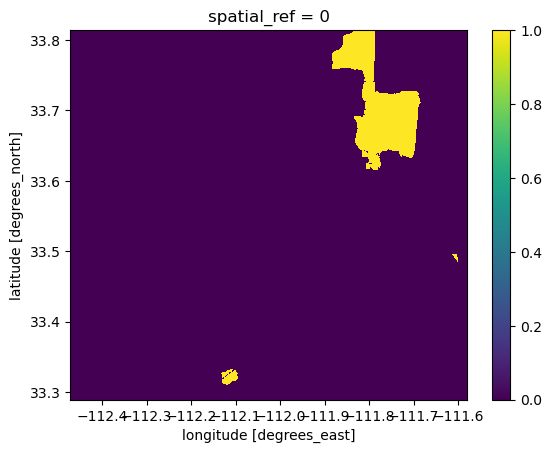

In [189]:
phoenix_bii_2020=phoenix_bii_20 >= .75
phoenix_bii_2020.plot()

In [190]:
#to calculate percentage area
phoenix_bii_2020.astype('int64')

<xarray.DataArray (y: 584, x: 992)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * x            (x) float64 -112.5 -112.5 -112.5 ... -111.6 -111.6 -111.6
  * y            (y) float64 33.81 33.81 33.81 33.81 ... 33.29 33.29 33.29 33.29
    spatial_ref  int64 0

In [193]:
#(pixels in class)/(total pixels) * 100
test = (phoenix_bii_2020.sum().item()/phoenix_mask.sum().item()) * 100
test

6.483497778377775

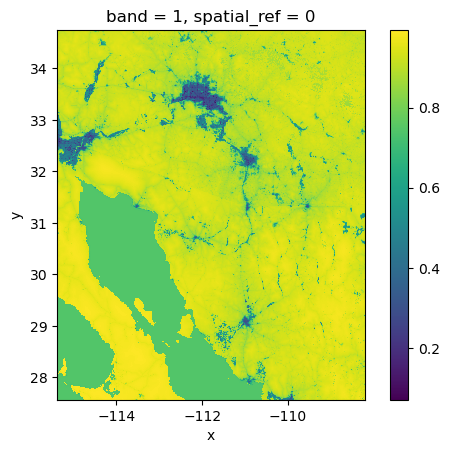

In [115]:
#final final map
fig, ax = plt.subplots()

phoenix.plot(ax = ax)
az_17.plot(ax = ax) 